In [57]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras import models, layers

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 1s 0us/step


In [38]:
print("The length of train data is {} and length of test data is {}".format(len(train_data), len(test_data)))

The length of train data is 8982 and length of test data is 2246


In [39]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newshire = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])
decoded_newshire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [40]:
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [41]:
X_train = vectorize_sequence(train_data)
X_test = vectorize_sequence(test_data)

In [42]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [43]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [44]:
model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

model.compile(optimizer="rmsprop",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [53]:
X_val = X_train[:1000]
partial_X_train = X_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [54]:
history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 287us/step - loss: 2.6832 - accuracy: 0.4994 - val_loss: 1.8194 - val_accuracy: 0.6390
Epoch 2/20
7982/7982 [==============================] - 2s 196us/step - loss: 1.4627 - accuracy: 0.7053 - val_loss: 1.3375 - val_accuracy: 0.7230
Epoch 3/20
7982/7982 [==============================] - 2s 191us/step - loss: 1.0688 - accuracy: 0.7762 - val_loss: 1.1819 - val_accuracy: 0.7330
Epoch 4/20
7982/7982 [==============================] - 1s 187us/step - loss: 0.8332 - accuracy: 0.8241 - val_loss: 1.0537 - val_accuracy: 0.7780
Epoch 5/20
7982/7982 [==============================] - 1s 187us/step - loss: 0.6637 - accuracy: 0.8601 - val_loss: 0.9836 - val_accuracy: 0.7960
Epoch 6/20
7982/7982 [==============================] - 2s 200us/step - loss: 0.5288 - accuracy: 0.8904 - val_loss: 0.9633 - val_accuracy: 0.7990
Epoch 7/20
7982/7982 [==============================] - 2s 194us/step - loss

In [56]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = range(1, len(loss) + 1)

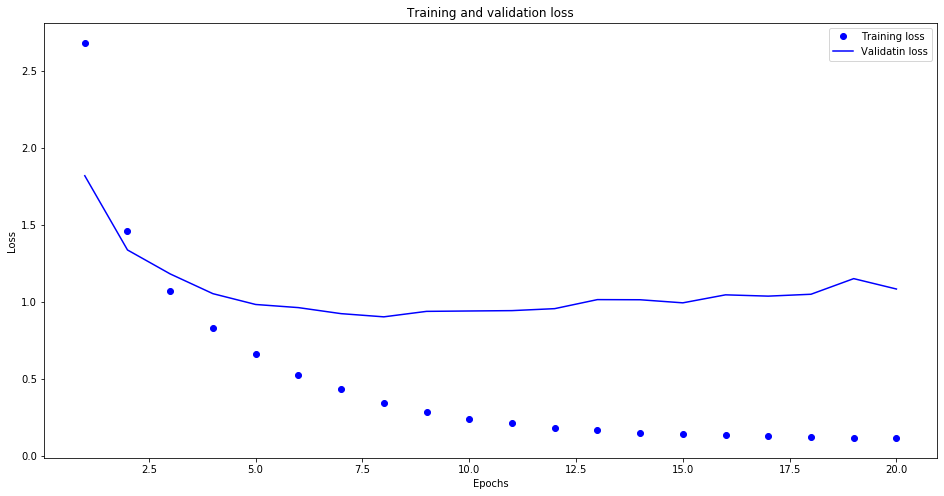

In [58]:
plt.figure(figsize=(16,8))
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validatin loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

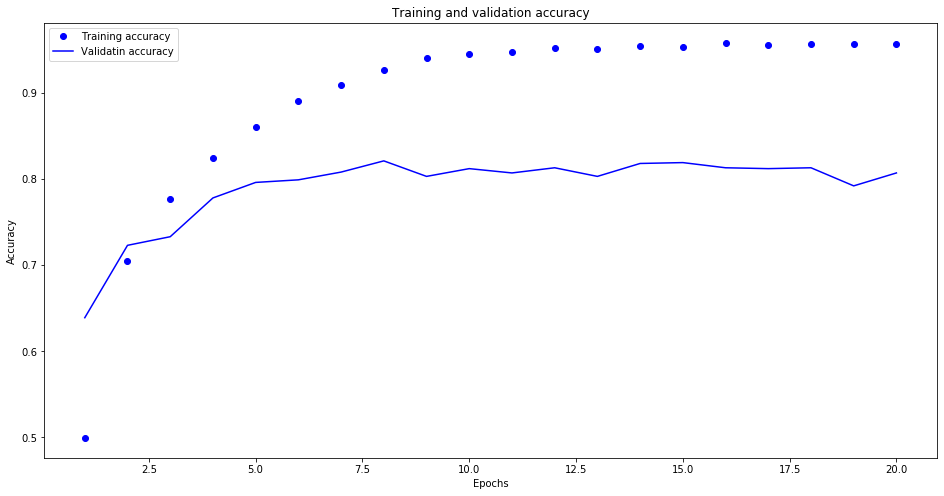

In [59]:
plt.figure(figsize=(16,8))
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validatin accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()